In [4]:
import numpy as np
import pandas as pd
import velodep as vld
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

# 1. Read data

In [5]:
monot_inj_d = pd.read_excel('Monotonic_injection(pressurization).xlsx')
monot_inj = pd.read_excel('Monotonic_injection(pressurization).xlsx', skiprows=2, header=None)
monot_inj.columns = monot_inj_d.columns
del monot_inj_d
monot_inj

,Time,Axial Force,Shear Stress,Axial Displacement,Injected volume,Pore Pressure,Confine Pressure,Confine Normal Stress,Axial Area Correction,Axial Subtended Angle,...,Smoothed slip rate,Slip velocity,Matrix deformation,Sample shortening,Fault slip,Fault slip (offset),Linear trend volume,Slip-induced difference,Slip-induced volume increasing rate,aperture change/K (aperture change*C)
0,0.00000,51.472153,11.326180,0.590126,0.000000,1.004530,4.405566,10.973143,0.993594,179.42348,...,0.444029,NaN,0.040960,0.512956,0.545030,0.000000,-0.003660,0.003660,NaN,NaN
1,0.01074,51.981628,11.439004,0.590788,-0.002077,1.004414,4.406403,11.039067,0.993607,179.42462,...,0.432277,NaN,0.041366,0.512855,0.544445,-0.000585,-0.003631,0.001554,NaN,NaN
2,0.02148,51.419151,11.314445,0.590374,-0.002077,1.005113,4.405267,10.966092,0.993588,179.42293,...,0.420653,NaN,0.040918,0.513284,0.545457,0.000427,-0.003602,0.001525,NaN,NaN
3,0.03222,51.876755,11.415781,0.590511,-0.002077,1.004259,4.405386,11.024639,0.993606,179.42456,...,0.409159,NaN,0.041282,0.512735,0.544403,-0.000628,-0.003572,0.001495,NaN,NaN
4,0.04296,51.724342,11.382029,0.590037,-0.002077,1.002990,4.407301,11.007077,0.993607,179.42459,...,0.397793,NaN,0.041161,0.512489,0.544259,-0.000772,-0.003543,0.001466,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26124,280.62890,51.918007,11.425113,0.666386,0.394195,2.096199,4.401819,11.031407,0.992493,179.32433,...,0.383299,NaN,0.041315,0.588548,0.631909,0.086879,0.759651,-0.365456,NaN,NaN
26125,280.63964,51.532124,11.339564,0.666395,0.393223,2.096409,4.399556,10.979812,0.992475,179.32278,...,0.391666,NaN,0.041008,0.589136,0.632942,0.087912,0.759680,-0.366457,NaN,NaN
26126,280.65039,51.984329,11.439817,0.666933,0.394195,2.094690,4.400863,11.038957,0.992487,179.32387,...,0.400131,NaN,0.041368,0.588996,0.632365,0.087335,0.759709,-0.365514,NaN,NaN
26127,280.66113,51.293285,11.286613,0.666200,0.393457,2.097365,4.399860,10.949581,0.992468,179.32210,...,0.408694,NaN,0.040818,0.589299,0.633350,0.088319,0.759738,-0.366281,NaN,NaN


In [6]:
monot_inj_apt_d = pd.read_excel('Monotonic_injection(pressurization).xlsx', 
                                sheet_name="Sheet1")
monot_inj_apt = pd.read_excel('Monotonic_injection(pressurization).xlsx', 
                              sheet_name="Sheet1", 
                              skiprows=2, 
                              header=None)
monot_inj_apt.columns = monot_inj_apt_d.columns
del monot_inj_apt_d
monot_inj_apt = monot_inj_apt[monot_inj_apt['Time'] <= 137.52]  # The injection terminates at 137.52 s
monot_inj_apt

,Time,Axial Force,Shear Stress,Axial Displacement,Injected volume,Pore Pressure,Confine Pressure,Confine Normal Stress,Axial Area Correction,Axial Subtended Angle,...,Smoothed slip rate,Slip velocity,Matrix deformation,Sample shortening,Fault slip,Fault slip (offset),Linear trend volume,Slip-induced difference,Slip-induced volume increasing rate,aperture change/K (aperture change*C)
0,0.00000,51.472153,11.326180,0.590126,0.000000,1.004530,4.405566,10.973143,0.993594,179.42348,...,0.444029,NaN,0.040960,0.512956,0.545030,0.000000,-0.003660,0.003660,NaN,NaN
1,0.01074,51.981628,11.439004,0.590788,-0.002077,1.004414,4.406403,11.039067,0.993607,179.42462,...,0.432277,NaN,0.041366,0.512855,0.544445,-0.000585,-0.003631,0.001554,NaN,NaN
2,0.02148,51.419151,11.314445,0.590374,-0.002077,1.005113,4.405267,10.966092,0.993588,179.42293,...,0.420653,NaN,0.040918,0.513284,0.545457,0.000427,-0.003602,0.001525,NaN,NaN
3,0.03222,51.876755,11.415781,0.590511,-0.002077,1.004259,4.405386,11.024639,0.993606,179.42456,...,0.409159,NaN,0.041282,0.512735,0.544403,-0.000628,-0.003572,0.001495,NaN,NaN
4,0.04296,51.724342,11.382029,0.590037,-0.002077,1.002990,4.407301,11.007077,0.993607,179.42459,...,0.397793,NaN,0.041161,0.512489,0.544259,-0.000772,-0.003543,0.001466,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12797,137.46777,51.432793,11.317481,0.607618,0.393190,2.379953,4.414202,10.977969,0.993335,179.40018,...,11.030000,0.009793,0.040929,0.530507,0.565333,0.020302,0.370252,0.022938,0.010689,2.721874e-10
12798,137.47851,51.926682,11.426880,0.607141,0.393190,2.381226,4.415453,11.042262,0.993364,179.40276,...,11.060000,0.007094,0.041322,0.529290,0.563473,0.018443,0.370282,0.022908,0.014182,3.611298e-10
12799,137.48925,51.393848,11.308855,0.607224,0.393190,2.381391,4.415356,10.974133,0.993339,179.40054,...,11.120000,0.010519,0.040898,0.530171,0.564981,0.019951,0.370311,0.022879,0.009754,2.483872e-10
12800,137.50000,52.130363,11.471998,0.608076,0.395568,2.384958,4.416281,11.069165,0.993359,179.40233,...,11.150000,0.009477,0.041484,0.529919,0.564013,0.018983,0.370340,0.025228,0.010128,2.579168e-10


# 2 Find the time duration need to be computed

## 2.1 rate-and-state

In [7]:
monot_inj_trunc = monot_inj[monot_inj['Time'] > 89.4]
monot_inj_trunc_resample_10hz = monot_inj_trunc[::10]
monot_inj_trunc_resample_10hz

,Time,Axial Force,Shear Stress,Axial Displacement,Injected volume,Pore Pressure,Confine Pressure,Confine Normal Stress,Axial Area Correction,Axial Subtended Angle,...,Smoothed slip rate,Slip velocity,Matrix deformation,Sample shortening,Fault slip,Fault slip (offset),Linear trend volume,Slip-induced difference,Slip-induced volume increasing rate,aperture change/K (aperture change*C)
8323,89.40722,51.800713,11.398943,0.591464,0.241200,1.908607,4.407258,11.016878,0.993589,179.42300,...,0.134774,0.000670,0.041222,0.513802,0.545705,0.000674,0.239528,0.001672,-0.000849,-2.161637e-11
8333,89.51464,51.891605,11.419073,0.591884,0.240362,1.910435,4.406900,11.028151,0.993587,179.42281,...,0.126847,0.001434,0.041294,0.514086,0.545949,0.000919,0.239820,0.000542,0.003456,8.799704e-11
8343,89.62207,51.394035,11.308884,0.591699,0.242440,1.908310,4.406255,10.963968,0.993568,179.42108,...,0.085719,-0.001024,0.040898,0.514646,0.547053,0.002023,0.240112,0.002328,0.001210,3.081980e-11
8353,89.72949,52.015476,11.446503,0.591752,0.242440,1.908742,4.406465,11.043515,0.993594,179.42348,...,-0.037706,-0.000931,0.041393,0.513768,0.545468,0.000438,0.240404,0.002036,-0.001223,-3.114591e-11
8363,89.83691,51.552006,11.343866,0.591942,0.242440,1.911144,4.405613,10.983504,0.993571,179.42139,...,-0.134325,0.000763,0.041024,0.514652,0.546915,0.001885,0.240696,0.001744,0.001646,4.191596e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26083,280.18847,52.026382,11.449138,0.666336,0.391079,2.098466,4.400114,11.043534,0.992498,179.32483,...,0.124769,0.000037,0.041401,0.588335,0.631564,0.086533,0.758453,-0.367374,-0.002282,-5.812257e-11
26093,280.29589,51.767956,11.391848,0.667049,0.393190,2.095174,4.399398,11.009834,0.992476,179.32286,...,0.172612,-0.000596,0.041196,0.589436,0.633072,0.088041,0.758745,-0.365555,-0.004591,-1.169118e-10
26103,280.40332,51.485367,11.329196,0.665910,0.393190,2.097444,4.401103,10.975362,0.992481,179.32324,...,0.230270,-0.000037,0.040971,0.588721,0.632506,0.087476,0.759037,-0.365847,-0.002720,-6.926407e-11
26113,280.51074,52.085472,11.462235,0.666358,0.393190,2.095103,4.400922,11.051902,0.992501,179.32504,...,0.297743,NaN,0.041448,0.588269,0.631432,0.086402,0.759329,-0.366139,NaN,NaN


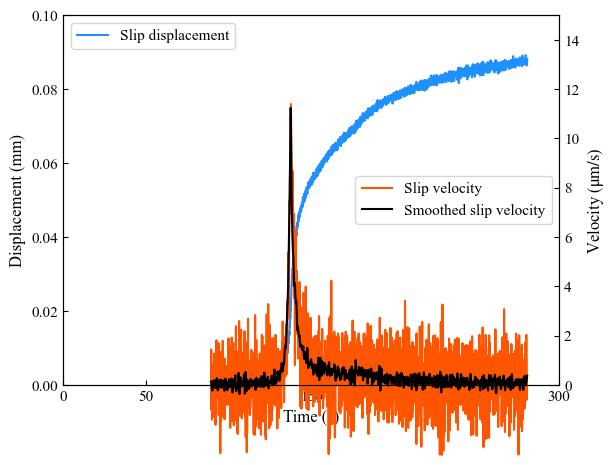

In [8]:
# Present truncated and resampled data

%matplotlib inline
config = {
    "font.family": "serif",
    "font.size": 11,
    "mathtext.fontset": "stix",
    "font.serif": ["Times New Roman"],
    "xtick.direction": "in",
    "ytick.direction": "in",
}
plt.rcParams.update(config)

# inch2cm = 2.54
# fig = plt.figure(figsize=(8/inch2cm, 6/inch2cm))

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(monot_inj_trunc_resample_10hz['Time'], 
         monot_inj_trunc_resample_10hz['Fault slip (offset)'], 
         '-', 
         color='dodgerblue',
         label='Slip displacement'
)

ax.set_xlim(0, 300)
ax.set_ylim(0, 0.1)

ax.set_xlabel('Time (s)', fontsize=config['font.size']+1)
ax.set_ylabel('Displacement (mm)', fontsize=config['font.size']+1)

ax.legend(loc='upper left')


ax2 = ax.twinx()

ax2.plot(monot_inj_trunc_resample_10hz['Time'], 
         monot_inj_trunc_resample_10hz['Slip velocity']*1e3, 
         '-', 
         color='#ff5500ff',
         label='Slip velocity',
         clip_on=False
)
ax2.plot(monot_inj_trunc_resample_10hz['Time'], 
         monot_inj_trunc_resample_10hz['Smoothed slip rate'], 
         '-', 
         color='k',
         label='Smoothed slip velocity',
         clip_on=False
)

ax2.set_ylim(0, 15)

ax2.set_ylabel('Velocity ($\\rm \\mu m/s$)', fontsize=config['font.size']+1)

ax2.legend(loc='right')


plt.show()

## 2.2 Fracture aperture

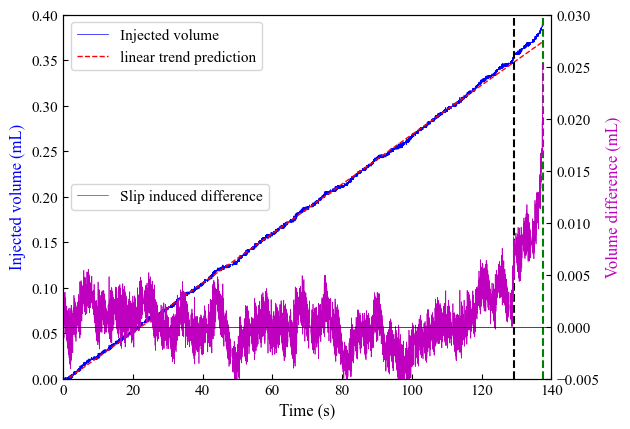

In [9]:
%matplotlib inline
config = {
    "font.family": "serif",
    "font.size": 11,
    "mathtext.fontset": "stix",
    "font.serif": ["Times New Roman"],
    "xtick.direction": "in",
    "ytick.direction": "in",
}
plt.rcParams.update(config)

inch2cm = 2.54
fig = plt.figure(figsize=(16/inch2cm, 12/inch2cm))
plt.subplots_adjust(wspace=0, hspace=0.3)

ax = fig.add_subplot(111)

ax.plot(
    monot_inj_apt['Time'],
    monot_inj_apt['Injected volume'],
    "-b",
    linewidth=0.5,
    label="Injected volume",
)
ax.plot(
    monot_inj_apt['Time'],
    monot_inj_apt["Linear trend volume"],
    "--r",
    linewidth=1,
    label="linear trend prediction",
)

ax.set_xlim(0, 140)
ax.set_ylim(0, 0.4)

ax.set_xlabel("Time (s)", fontsize=config['font.size'] + 1)
ax.set_ylabel("Injected volume (mL)", color='b', fontsize=config['font.size'] + 1)

ax.legend()

ax2 = ax.twinx()

ax2.plot(
    monot_inj_apt['Time'],
    monot_inj_apt["Slip-induced difference"],
    "-m",
    linewidth=0.5,
    label="Slip induced difference",
)
ax2.plot([0, 140], [0, 0], '-k', linewidth=0.5)

ax2.set_ylim(-0.005, 0.03)

ax2.set_ylabel('Volume difference (mL)', color='m', fontsize=config['font.size'] + 1)

ax2.legend(loc='center left')


start_time = 129.2
end_time = 137.52
ax.plot([start_time, start_time], [0, 0.4], "k--")
ax.plot([end_time, end_time], [0, 0.4], "g--")

plt.show()

In [10]:
monot_inj_dil = monot_inj_apt[
    (monot_inj_apt['Time'] >= start_time) 
    & (monot_inj_apt['Time'] <= end_time)
].copy()
# Resample data
monot_inj_dil = monot_inj_dil[::10].reset_index(drop=True)
monot_inj_dil

,Time,Axial Force,Shear Stress,Axial Displacement,Injected volume,Pore Pressure,Confine Pressure,Confine Normal Stress,Axial Area Correction,Axial Subtended Angle,...,Smoothed slip rate,Slip velocity,Matrix deformation,Sample shortening,Fault slip,Fault slip (offset),Linear trend volume,Slip-induced difference,Slip-induced volume increasing rate,aperture change/K (aperture change*C)
0,129.20703,52.050991,11.454376,0.595057,0.356105,2.302039,4.406197,11.048000,0.993547,179.41925,...,0.150676,0.000652,0.041421,0.517020,0.549191,0.004161,0.347783,0.008322,0.003955,1.007031e-10
1,129.31445,51.558868,11.345390,0.594258,0.355368,2.304176,4.407172,10.986104,0.993537,179.41835,...,0.246267,-0.001341,0.041029,0.516958,0.549572,0.004542,0.348075,0.007293,0.007446,1.895981e-10
2,129.42187,51.631229,11.361417,0.594053,0.356373,2.301708,4.406949,10.995104,0.993543,179.41890,...,0.240893,-0.000652,0.041087,0.516645,0.549143,0.004113,0.348367,0.008006,0.001648,4.196130e-11
3,129.52929,52.020382,11.447598,0.594625,0.356607,2.304052,4.406225,11.044093,0.993552,179.41969,...,0.264056,-0.000168,0.041397,0.516633,0.548772,0.003742,0.348660,0.007947,-0.000787,-2.005182e-11
4,129.63671,51.519497,11.336670,0.594293,0.356340,2.303215,4.405979,10.979877,0.993535,179.41815,...,0.499345,0.000838,0.040998,0.517052,0.549717,0.004686,0.348952,0.007388,-0.002221,-5.655802e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,137.04882,51.366684,11.302836,0.604625,0.384145,2.354076,4.411889,10.967002,0.993376,179.40387,...,8.160000,0.007671,0.040876,0.527614,0.562053,0.017022,0.369113,0.015032,0.009317,2.372457e-10
74,137.15625,51.878788,11.416265,0.605068,0.386523,2.355634,4.413669,11.034210,0.993392,179.40532,...,8.910000,0.008378,0.041284,0.527288,0.561206,0.016176,0.369405,0.017118,0.009816,2.499518e-10
75,137.26367,51.841110,11.407922,0.605923,0.386490,2.357859,4.414959,11.030755,0.993378,179.40404,...,9.780000,0.007094,0.041254,0.528200,0.562293,0.017263,0.369697,0.016793,0.019983,5.088613e-10
76,137.37109,51.458599,11.323198,0.606624,0.387494,2.366565,4.413691,10.980685,0.993351,179.40158,...,10.500000,0.008397,0.040949,0.529474,0.564116,0.019086,0.369989,0.017505,0.014617,3.722239e-10


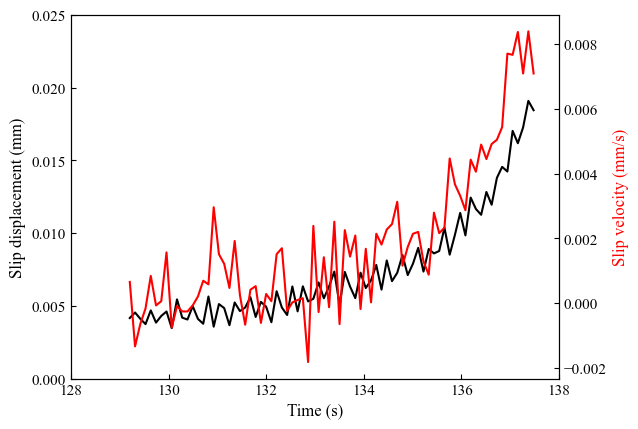

In [11]:
%matplotlib inline
config = {
    "font.family": "serif",
    "font.size": 11,
    "mathtext.fontset": "stix",
    "font.serif": ["Times New Roman"],
    "xtick.direction": "in",
    "ytick.direction": "in",
}
plt.rcParams.update(config)

inch2cm = 2.54
fig = plt.figure(figsize=(16/inch2cm, 12/inch2cm))
plt.subplots_adjust(wspace=0, hspace=0.3)

ax = fig.add_subplot(111)

ax.plot(monot_inj_dil['Time'], monot_inj_dil['Fault slip (offset)'], '-k')

ax.set_xlim(128, 138)
ax.set_ylim(0, 0.025)

ax.set_xlabel('Time (s)', fontsize=config['font.size'] + 1)
ax.set_ylabel('Slip displacement (mm)', fontsize=config['font.size'] + 1, color='k')

ax2 = ax.twinx()

ax2.plot(monot_inj_dil['Time'], monot_inj_dil['Slip velocity'], '-r')

ax2.set_ylabel('Slip velocity (mm/s)', color='r', fontsize=config['font.size'] + 1)

plt.show()

# 3 Adjust the velocities for frac aperture

In [12]:
vld.check_0(monot_inj_dil['Slip velocity'])

0 0s are in the velocity list.


In [13]:
for i in monot_inj_dil.index[1:]:
    if monot_inj_dil['Slip velocity'][i] == 0:
        monot_inj_dil.loc[i, 'Slip velocity'] = (
            monot_inj_dil['Slip velocity'][i-1] + monot_inj_dil['Slip velocity'][i+1]
        ) / 2

In [14]:
vld.check_0(monot_inj_dil['Slip velocity'])

0 0s are in the velocity list.


# 4. Set predetermined parameters
## 4.1 Rate-and-state

### 4.1.1 Independent sequential parameters

In [15]:
t = monot_inj_trunc_resample_10hz['Time'].values.copy()  # s
sig_n = monot_inj_trunc_resample_10hz['Confine Normal Stress'].values.copy()  # MPa
pp = monot_inj_trunc_resample_10hz['Pore Pressure'].values.copy()  # MPa

### 4.1.2 Initial parameters

In [16]:
v_0 = 2.1236051502145862e-05  # The average slip velocity around 89.2 s
mu_0 = monot_inj['Shear Stress'].mean() / (sig_n - pp)[0]
disp_0 = monot_inj_trunc['Fault slip (offset)'].values[0]  # mm

## 4.2 Fracture aperture

In [17]:
perm = 2.0e-12  # permeability, unit is m^2

# Arguments needed to compute b_slip
b_0 = np.sqrt(12 * perm) * 1e3  # initial aperture, unit is mm
u_ini = monot_inj_dil['Fault slip (offset)'].values[:-1]
u_end = monot_inj_dil['Fault slip (offset)'].values[1:]  # slip displacement, unit is mm

# Arguments needed to compute dilation parameters
v = monot_inj_dil['Slip velocity'].values[1:]
# v = monot_inj_dil['Smoothed slip rate'].values[1:] / 1e3  # mm/s

# Arguments needed to compute RMSE
# Normalized Delta b: (aperture-change * C) / max(aperture-change * C)
NDB_exp = (
    monot_inj_dil['aperture change/K (aperture change*C)'].values[1:] 
    / np.max(monot_inj_dil['aperture change/K (aperture change*C)'].values[1:])
)

# 5. Optimize

In [16]:
def rmse_rsf(paras):
    a, b, Dc, alpha = paras

    rsf_sovler = vld.RSF_tau_fix(
        a, b, Dc, alpha, mu_0, v_0, disp_0, sig_n, pp, t
    )
    rsf_sovler.solve_rk4()

    rmse_obj = vld.rmse(rsf_sovler.disp, monot_inj_trunc_resample_10hz['Fault slip (offset)'])

    return rmse_obj

In [19]:
def rmse_apt(paras):
    dil_fact, Dc, dil_ang = paras

    apt = vld.FracAperture(dil_fact, Dc, dil_ang, b_0, u_end, u_ini, v)
    apt.solve()

    NDB_mod: np.ndarray = (apt.b_mod - b_0) / np.max(apt.b_mod - b_0)
    rmse_obj = vld.rmse(NDB_mod, NDB_exp)

    return rmse_obj

In [26]:
def generate_samples(func, n_samples=10000, bounds=None):
    n_params = len(bounds)
    samples = np.empty((n_samples, n_params))
    for i in range(n_params):
        lb, ub = bounds[i]
        samples[:, i] = np.random.uniform(low=lb, high=ub, size=n_samples)
    func_values = np.apply_along_axis(func, 1, samples)
    return func_values

In [27]:
bounds_rmse_rsf = [
    (0.0002, 0.05),  # a
    (0.0002, 0.05),  # b
    (0.001, 2),      # Dc
    (0.005, 0.5)     # alpha
]
bounds_rmse_apt = [
    (0, 3),          # dil_fact
    (0.001, 2),      # Dc
    (0, 20)          # dil_ang
]

samples_rmse_rsf = generate_samples(rmse_rsf, n_samples=500000, bounds=bounds_rmse_rsf)
# fill inf values with nan
samples_rmse_rsf = np.where(np.isinf(samples_rmse_rsf), np.nan, samples_rmse_rsf)

samples_rmse_apt = generate_samples(rmse_apt, n_samples=500000, bounds=bounds_rmse_apt)
# fill inf values with nan
samples_rmse_apt = np.where(np.isinf(samples_rmse_apt), np.nan, samples_rmse_apt)

In [30]:
rmse_rsf_max = np.nanmax(samples_rmse_rsf)
rmse_rsf_min = np.nanmin(samples_rmse_rsf)

rmse_apt_max = np.nanmax(samples_rmse_apt)
rmse_apt_min = np.nanmin(samples_rmse_apt)

In [31]:
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

In [32]:
def fun_obj(paras) -> float:
    a, b, Dc, alpha, dil_fact, dil_ang = paras

    paras_rsf = (a, b, Dc, alpha)
    rmse_rsf_value = rmse_rsf(paras_rsf)

    paras_apt = (dil_fact, Dc, dil_ang)
    rmse_apt_value = rmse_apt(paras_apt)

    # Normalize
    rmse_rsf_normalized = normalize(rmse_rsf_value, rmse_rsf_min, rmse_rsf_max)
    rmse_apt_normalized = normalize(rmse_apt_value, rmse_apt_min, rmse_apt_max)

    # Weighted sum
    w_rsf = 0.5
    w_apt = 0.5
    rmse_obj = w_rsf * rmse_rsf_normalized + w_apt * rmse_apt_normalized
    
    return rmse_obj

In [33]:
# Integrate the searched space
bounds = bounds_rmse_rsf + bounds_rmse_apt[:1] + bounds_rmse_apt[2:]
lb = [b[0] for b in bounds]
ub = [b[1] for b in bounds]
parameters = ['a', 'b', 'Dc', 'alpha', 'dil_fact', 'dil_ang']
for i in range(len(parameters)):
    print(f'The lower bound of {parameters[i]} is {lb[i]}, the upper bound of {parameters[i]} is {ub[i]}.')
# bounds

The lower bound of a is 0.0002, the upper bound of a is 0.05.
The lower bound of b is 0.0002, the upper bound of b is 0.05.
The lower bound of Dc is 0.001, the upper bound of Dc is 2.
The lower bound of alpha is 0.005, the upper bound of alpha is 0.5.
The lower bound of dil_fact is 0, the upper bound of dil_fact is 3.
The lower bound of dil_ang is 0, the upper bound of dil_ang is 20.


In [ ]:
from sko.GA import GA

# Parameters for Generic algorithm
n_dim = 6
size_pop = 300
max_iter = 1000

ga = GA(
    func=fun_obj,
    n_dim=n_dim,
    size_pop=size_pop,
    max_iter=max_iter,
    lb=lb,  # dil_fact, Dc, dil_ang
    ub=ub,  # dil_fact, Dc, dil_ang
    #     precision=1e-7,
)

best_x, best_y = ga.run()

for i in range(len(parameters)):
    print(f'The best fitted {parameters[i]}: {best_x[i]}.')
print(f"Lowest value of objective function: {best_y[0]}")

The best fitted a: 0.011902292828164728.
The best fitted b: 0.01009214189937954.
The best fitted Dc: 0.22419066024394813.
The best fitted alpha: 0.1351588213633086.
The best fitted dil_fact: 0.24248797424101753.
The best fitted dil_ang: 5.496988615009891.
Lowest value of objective function: 1.375302270201111e-06


# 6. Plot to compare modeled and experimental values

## 6.1 Rate-and-state

In [18]:
a = 0.011902292828164728
b = 0.01009214189937954
Dc = 0.22419066024394813
alpha = 0.1351588213633086
dil_fact = 0.24248797424101753
dil_ang = 5.496988615009891

rsf_sovler = vld.RsfTauFix(
    a, b, Dc, alpha, mu_0, v_0, disp_0, sig_n, pp, t
)

rsf_sovler.solve_rk4()

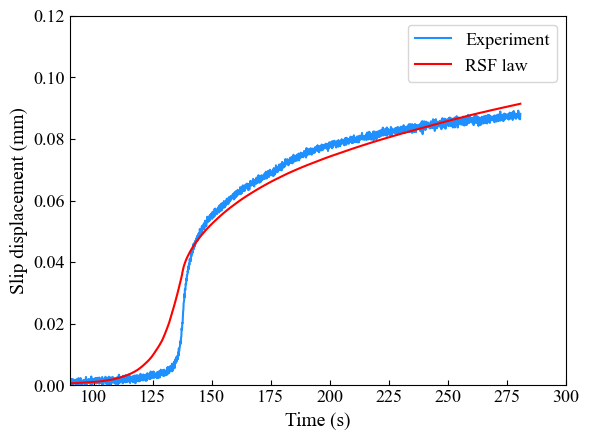

In [19]:
%matplotlib inline
config = {
    "font.family": "serif",
    "font.size": 13,
    "mathtext.fontset": "stix",
    "font.serif": ["Times New Roman"],
    "xtick.direction": "in",
    "ytick.direction": "in",
}
plt.rcParams.update(config)

# inch2cm = 2.54
# fig = plt.figure(figsize=(8/inch2cm, 6/inch2cm))

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(monot_inj_trunc_resample_10hz['Time'], 
        monot_inj_trunc_resample_10hz['Fault slip (offset)'], 
        '-', 
        color='dodgerblue',
        label='Experiment'
)

ax.plot(t, 
        rsf_sovler.disp, 
        '-', 
        color='r',
        label='RSF law'
)

ax.set_xlim(90, 300)
ax.set_ylim(0, 0.12)

ax.set_xlabel('Time (s)', fontsize=config["font.size"]+1)
ax.set_ylabel('Slip displacement (mm)', fontsize=config["font.size"]+1)

ax.legend()

# plt.savefig('./Figures/Displacement_monotonic_injection.jpg', dpi=300, bbox_inches='tight')
plt.show()

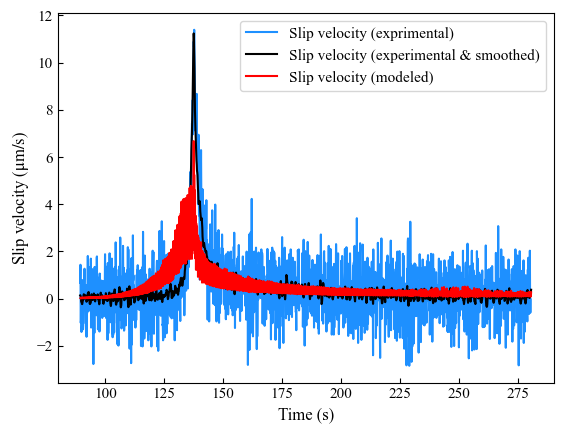

In [20]:
v_mod = np.diff(rsf_sovler.disp) / np.diff(t)

%matplotlib inline
config = {
    "font.family": "serif",
    "font.size": 11,
    "mathtext.fontset": "stix",
    "font.serif": ["Times New Roman"],
    "xtick.direction": "in",
    "ytick.direction": "in",
}
plt.rcParams.update(config)

# inch2cm = 2.54
# fig = plt.figure(figsize=(8/inch2cm, 6/inch2cm))

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(monot_inj_trunc_resample_10hz['Time'], 
         monot_inj_trunc_resample_10hz['Slip velocity']*1e3, 
         '-', 
         color='dodgerblue',
         label='Slip velocity (exprimental)',
         clip_on=False
)
ax.plot(monot_inj_trunc_resample_10hz['Time'], 
         monot_inj_trunc_resample_10hz['Smoothed slip rate'],
         '-', 
         color='k',
         label='Slip velocity (experimental & smoothed)',
         clip_on=False
)

ax.plot(t[1:], 
        v_mod * 1e3, 
        '-', 
        color='r',
        label='Slip velocity (modeled)'
)

ax.set_xlabel('Time (s)', fontsize=config['font.size'] + 1)
ax.set_ylabel('Slip velocity ($\\rm \\mu m/s$)', fontsize=config['font.size'] + 1)

ax.legend()

plt.show()

In [21]:
modeled_slip_monot_inj = {
    "Time (s)": t[1:],
    "Slip displacement (mm)": rsf_sovler.disp[1:],
    "Slip velocity (mm/s)": v_mod,
    "Experimental slip displacement (mm)": monot_inj_trunc_resample_10hz['Fault slip (offset)'].values[1:],
    "Experimental slip velocity (μm)": monot_inj_trunc_resample_10hz['Smoothed slip rate'].values[1:]
}
modeled_slip_monot_inj = pd.DataFrame(modeled_slip_monot_inj)
modeled_slip_monot_inj

,Time (s),Slip displacement (mm),Slip velocity (mm/s),Experimental slip displacement (mm),Experimental slip velocity (μm)
0,89.51464,0.000676,0.000019,0.000919,0.126847
1,89.62207,0.000681,0.000038,0.002023,0.085719
2,89.72949,0.000682,0.000015,0.000438,-0.037706
3,89.83691,0.000686,0.000032,0.001885,-0.134325
4,89.94433,0.000689,0.000028,0.001377,-0.152228
...,...,...,...,...,...
1775,280.18847,0.091364,0.000099,0.086533,0.124769
1776,280.29589,0.091380,0.000148,0.088041,0.172612
1777,280.40332,0.091404,0.000221,0.087476,0.230270
1778,280.51074,0.091413,0.000088,0.086402,0.297743


## 6.2 Fracture aperture

In [22]:
perm = 2.0e-12  # permeability, unit is m^2

# Arguments needed to compute b_slip
b_0 = np.sqrt(12 * perm) * 1e3  # initial aperture, unit is mm
u_ini = monot_inj_dil['Fault slip (offset)'].values[:-1]
u_end = monot_inj_dil['Fault slip (offset)'].values[1:]  # slip displacement, unit is mm

# Arguments needed to compute dilation parameters
v = monot_inj_dil['Slip velocity'].values[1:]

# Arguments needed to compute RMSE
# Normalized Delta b: (aperture-change * C) / max(aperture-change * C)
NDB_exp = (
    monot_inj_dil['aperture change/K (aperture change*C)'].values[1:] 
    / np.max(monot_inj_dil['aperture change/K (aperture change*C)'].values[1:])
)

In [23]:
apt = vld.FracAperture(dil_fact, Dc, dil_ang, b_0, u_end, u_ini, v)
apt.solve()
NDB_mod: np.ndarray = (apt.b_mod - b_0) / np.max(apt.b_mod - b_0)

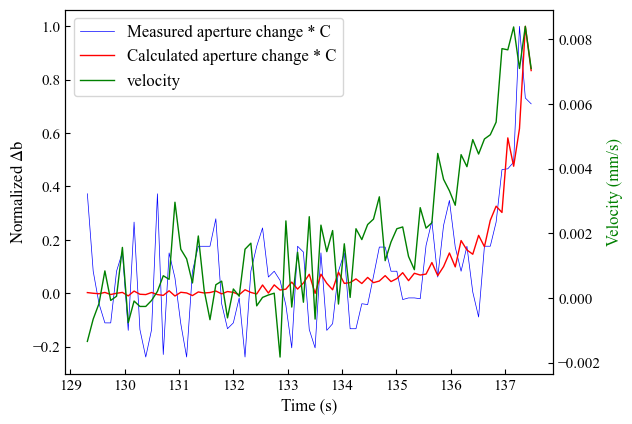

In [24]:
%matplotlib inline
config = {
    "font.family": "serif",
    "font.size": 11,
    "mathtext.fontset": "stix",
    "font.serif": ["Times New Roman"],
    "xtick.direction": "in",
    "ytick.direction": "in",
}
plt.rcParams.update(config)

inch2cm = 2.54
fig = plt.figure(figsize=(16/inch2cm, 12/inch2cm))
plt.subplots_adjust(wspace=0, hspace=0.3)

ax = fig.add_subplot(111)

l1, = ax.plot(
    monot_inj_dil['Time'][1:],
    NDB_exp,
    "-",
    color="b",
    linewidth=0.5,
    markerfacecolor="none",
    # markersize=5,
    label="Measured aperture change * C",
)
l2, = ax.plot(
    monot_inj_dil['Time'][1:],
    NDB_mod,
    "-",
    color="r",
    linewidth=1,
    markerfacecolor="none",
    # markersize=5,
    label="Calculated aperture change * C",
)

ax.set_xlabel('Time (s)', fontsize = config['font.size'] + 1)
ax.set_ylabel("$\\rm Normalized \\ \\Delta b$", fontsize = config['font.size'] + 1)


ax2 = ax.twinx()

l3, = ax2.plot(
    monot_inj_dil['Time'][1:],
    v,
    '-',
    color='g',
    linewidth=1,
    markerfacecolor='none',
    label='velocity'
)

ax2.set_ylabel("Velocity (mm/s)", fontsize = config['font.size'] + 1, color='g')

# set legend
lines = [l1, l2, l3]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper left', fontsize = config['font.size'] + 1)

plt.show()

## 6.3 Evolve of aperture and permeability from 100 s

In [25]:
modeled_data = {
    "Time (s)": monot_inj_trunc_resample_10hz['Time'].values[1:],
    "Modeled slip displacement (mm)": rsf_sovler.disp[1:],
    "Modeled slip velocity (mm/s)": v_mod,
    "Experimental slip velocity (mm/s)": monot_inj_trunc_resample_10hz['Smoothed slip rate'].values[1:]/1e3
}
modeled_data = pd.DataFrame(modeled_data)
modeled_data

,Time (s),Modeled slip displacement (mm),Modeled slip velocity (mm/s),Experimental slip velocity (mm/s)
0,89.51464,0.000676,0.000019,0.000127
1,89.62207,0.000681,0.000038,0.000086
2,89.72949,0.000682,0.000015,-0.000038
3,89.83691,0.000686,0.000032,-0.000134
4,89.94433,0.000689,0.000028,-0.000152
...,...,...,...,...
1775,280.18847,0.091364,0.000099,0.000125
1776,280.29589,0.091380,0.000148,0.000173
1777,280.40332,0.091404,0.000221,0.000230
1778,280.51074,0.091413,0.000088,0.000298


In [26]:
modeled_data_resample = modeled_data[::10]
modeled_data_resample = modeled_data_resample[modeled_data_resample['Time (s)'] >= 129.2]
modeled_data_resample

,Time (s),Modeled slip displacement (mm),Modeled slip velocity (mm/s),Experimental slip velocity (mm/s)
370,129.26074,0.015166,0.002277,0.000179
380,130.33496,0.017142,0.002645,0.000316
390,131.40918,0.019147,0.001290,0.000592
400,132.48339,0.021735,0.001443,0.000677
410,133.55761,0.024616,0.002867,0.000834
...,...,...,...,...
1730,275.35449,0.090546,0.000090,0.000242
1740,276.42871,0.090740,0.000211,-0.000108
1750,277.50293,0.090917,0.000204,0.000158
1760,278.57714,0.091088,0.000137,0.000017


In [27]:
perm = 2.0e-12  # permeability, unit is m^2

# Arguments needed to compute b_slip
b_0_perm = np.sqrt(12 * perm) * 1e3  # initial aperture, unit is mm
b_0 = b_0_perm + modeled_data_resample['Modeled slip displacement (mm)'].values[0] * np.tan(dil_ang * np.pi / 180)

u_ini = modeled_data_resample['Modeled slip displacement (mm)'].values[:-1]
u_end = modeled_data_resample['Modeled slip displacement (mm)'].values[1:]  # slip displacement, unit is mm

# Arguments needed to compute dilation parameters
v = modeled_data_resample['Modeled slip velocity (mm/s)'].values[1:]
# v = modeled_data['Experimental slip velocity (mm/s)'].values[1:]

In [28]:
apt = vld.FracAperture(dil_fact, Dc, dil_ang, b_0, u_end, u_ini, v)
apt.solve()

In [29]:
modeled_data_resample.reset_index(inplace=True, drop=True)
modeled_data_resample = modeled_data_resample.drop(0, axis=0)
modeled_data_resample.reset_index(inplace=True, drop=True)
modeled_data_resample

,Time (s),Modeled slip displacement (mm),Modeled slip velocity (mm/s),Experimental slip velocity (mm/s)
0,130.33496,0.017142,0.002645,0.000316
1,131.40918,0.019147,0.001290,0.000592
2,132.48339,0.021735,0.001443,0.000677
3,133.55761,0.024616,0.002867,0.000834
4,134.63183,0.027541,0.004265,0.001570
...,...,...,...,...
135,275.35449,0.090546,0.000090,0.000242
136,276.42871,0.090740,0.000211,-0.000108
137,277.50293,0.090917,0.000204,0.000158
138,278.57714,0.091088,0.000137,0.000017


In [30]:
modeled_data_resample["Disp-dependent aperture change"] = apt.b_slip - b_0
modeled_data_resample['Disp- and vel-dependent aperture change'] = apt.b_mod - b_0

modeled_data_resample["Disp-dependent aperture"] = apt.b_slip
modeled_data_resample['Disp- and vel-dependent aperture'] = apt.b_mod

modeled_data_resample

,Time (s),Modeled slip displacement (mm),Modeled slip velocity (mm/s),Experimental slip velocity (mm/s),Disp-dependent aperture change,Disp- and vel-dependent aperture change,Disp-dependent aperture,Disp- and vel-dependent aperture
0,130.33496,0.017142,0.002645,0.000316,0.000190,0.000190,0.006549,0.006549
1,131.40918,0.019147,0.001290,0.000592,0.000383,0.000368,0.006742,0.006726
2,132.48339,0.021735,0.001443,0.000677,0.000632,0.000599,0.006991,0.006957
3,133.55761,0.024616,0.002867,0.000834,0.000909,0.000865,0.007268,0.007224
4,134.63183,0.027541,0.004265,0.001570,0.001191,0.001144,0.007549,0.007502
...,...,...,...,...,...,...,...,...
135,275.35449,0.090546,0.000090,0.000242,0.007254,0.002414,0.013613,0.008772
136,276.42871,0.090740,0.000211,-0.000108,0.007273,0.002393,0.013631,0.008752
137,277.50293,0.090917,0.000204,0.000158,0.007290,0.002375,0.013648,0.008733
138,278.57714,0.091088,0.000137,0.000017,0.007307,0.002356,0.013665,0.008714


In [31]:
modeled_data_resample['Transient permeability (disp-dep m^2)'] = (
    (modeled_data_resample['Disp-dependent aperture'] * 1e-3)**2 / 12
)
modeled_data_resample['Transient permeability change (disp-dep)'] = (
    modeled_data_resample['Disp-dependent aperture']**2 / b_0_perm**2
)

modeled_data_resample['Transient permeability (disp- & vel-dep m^2)'] = (
    (modeled_data_resample['Disp- and vel-dependent aperture'] * 1e-3)**2 / 12
)
modeled_data_resample['Transient permeability change (disp- & vel-dep)'] = (
    modeled_data_resample['Disp- and vel-dependent aperture']**2 / b_0_perm**2
)

modeled_data_resample

,Time (s),Modeled slip displacement (mm),Modeled slip velocity (mm/s),Experimental slip velocity (mm/s),Disp-dependent aperture change,Disp- and vel-dependent aperture change,Disp-dependent aperture,Disp- and vel-dependent aperture,Transient permeability (disp-dep m^2),Transient permeability change (disp-dep),Transient permeability (disp- & vel-dep m^2),Transient permeability change (disp- & vel-dep)
0,130.33496,0.017142,0.002645,0.000316,0.000190,0.000190,0.006549,0.006549,3.573752e-12,1.786876,3.573752e-12,1.786876
1,131.40918,0.019147,0.001290,0.000592,0.000383,0.000368,0.006742,0.006726,3.787430e-12,1.893715,3.770350e-12,1.885175
2,132.48339,0.021735,0.001443,0.000677,0.000632,0.000599,0.006991,0.006957,4.072427e-12,2.036213,4.033291e-12,2.016646
3,133.55761,0.024616,0.002867,0.000834,0.000909,0.000865,0.007268,0.007224,4.401922e-12,2.200961,4.348698e-12,2.174349
4,134.63183,0.027541,0.004265,0.001570,0.001191,0.001144,0.007549,0.007502,4.749530e-12,2.374765,4.690348e-12,2.345174
...,...,...,...,...,...,...,...,...,...,...,...,...
135,275.35449,0.090546,0.000090,0.000242,0.007254,0.002414,0.013613,0.008772,1.544230e-11,7.721152,6.412633e-12,3.206317
136,276.42871,0.090740,0.000211,-0.000108,0.007273,0.002393,0.013631,0.008752,1.548473e-11,7.742365,6.382643e-12,3.191321
137,277.50293,0.090917,0.000204,0.000158,0.007290,0.002375,0.013648,0.008733,1.552346e-11,7.761729,6.355426e-12,3.177713
138,278.57714,0.091088,0.000137,0.000017,0.007307,0.002356,0.013665,0.008714,1.556095e-11,7.780476,6.328141e-12,3.164071


In [32]:
modeled_slip_monot_inj_trunc = modeled_slip_monot_inj[
    modeled_slip_monot_inj['Time (s)'] <= modeled_data_resample['Time (s)'].values[0]
].copy()
modeled_slip_monot_inj_trunc

,Time (s),Slip displacement (mm),Slip velocity (mm/s),Experimental slip displacement (mm),Experimental slip velocity (μm)
0,89.51464,0.000676,0.000019,0.000919,0.126847
1,89.62207,0.000681,0.000038,0.002023,0.085719
2,89.72949,0.000682,0.000015,0.000438,-0.037706
3,89.83691,0.000686,0.000032,0.001885,-0.134325
4,89.94433,0.000689,0.000028,0.001377,-0.152228
...,...,...,...,...,...
376,129.90527,0.016268,0.001116,0.003642,0.342678
377,130.01269,0.016463,0.001817,0.004200,0.322281
378,130.12011,0.016746,0.002634,0.004475,0.243316
379,130.22753,0.016858,0.001042,0.003816,0.283274


In [33]:
modeled_slip_monot_inj_trunc['Disp-dependent aperture (mm)'] = (
    b_0_perm + modeled_slip_monot_inj_trunc['Slip displacement (mm)'] * np.tan(dil_ang * np.pi / 180)
)
modeled_slip_monot_inj_trunc['Permeability change'] = (
    modeled_slip_monot_inj_trunc['Disp-dependent aperture (mm)'] ** 2 / b_0_perm ** 2
)

modeled_slip_monot_inj_trunc

,Time (s),Slip displacement (mm),Slip velocity (mm/s),Experimental slip displacement (mm),Experimental slip velocity (μm),Disp-dependent aperture (mm),Permeability change
0,89.51464,0.000676,0.000019,0.000919,0.126847,0.004964,1.026752
1,89.62207,0.000681,0.000038,0.002023,0.085719,0.004964,1.026915
2,89.72949,0.000682,0.000015,0.000438,-0.037706,0.004965,1.026981
3,89.83691,0.000686,0.000032,0.001885,-0.134325,0.004965,1.027118
4,89.94433,0.000689,0.000028,0.001377,-0.152228,0.004965,1.027238
...,...,...,...,...,...,...,...
376,129.90527,0.016268,0.001116,0.003642,0.342678,0.006465,1.741262
377,130.01269,0.016463,0.001817,0.004200,0.322281,0.006483,1.751395
378,130.12011,0.016746,0.002634,0.004475,0.243316,0.006511,1.766136
379,130.22753,0.016858,0.001042,0.003816,0.283274,0.006521,1.771984


In [34]:
merged_time = np.concatenate(
    (
        modeled_slip_monot_inj_trunc[modeled_slip_monot_inj_trunc['Time (s)'] >= 100]['Time (s)'].values[:-10],
        modeled_data_resample['Time (s)'].values[1:].copy()
    ),
    axis=0
)
merged_time

array([100.04199, 100.14941, 100.25683, 100.36425, 100.47168, 100.5791 ,
       100.68652, 100.79394, 100.90136, 101.00878, 101.11621, 101.22363,
       101.33105, 101.43847, 101.54589, 101.65332, 101.76074, 101.86816,
       101.97558, 102.083  , 102.19043, 102.29785, 102.40527, 102.51269,
       102.62011, 102.72753, 102.83496, 102.94238, 103.0498 , 103.15722,
       103.26464, 103.37207, 103.47949, 103.58691, 103.69433, 103.80175,
       103.90918, 104.0166 , 104.12402, 104.23144, 104.33886, 104.44628,
       104.55371, 104.66113, 104.76855, 104.87597, 104.98339, 105.09082,
       105.19824, 105.30566, 105.41308, 105.5205 , 105.62793, 105.73535,
       105.84277, 105.95019, 106.05761, 106.16503, 106.27246, 106.37988,
       106.4873 , 106.59472, 106.70214, 106.80957, 106.91699, 107.02441,
       107.13183, 107.23925, 107.34668, 107.4541 , 107.56152, 107.66894,
       107.77636, 107.88378, 107.99121, 108.09863, 108.20605, 108.31347,
       108.42089, 108.52832, 108.63574, 108.74316, 

In [35]:
merged_vel_fact = np.concatenate(
    (
        ((modeled_slip_monot_inj_trunc[modeled_slip_monot_inj_trunc['Time (s)'] >= 100]['Disp-dependent aperture (mm)'] - b_0_perm) 
         / (modeled_slip_monot_inj_trunc[modeled_slip_monot_inj_trunc['Time (s)'] >= 100]['Disp-dependent aperture (mm)'] - b_0_perm)).values[:-10],
        ((apt.b_mod - b_0_perm) / (apt.b_slip - b_0_perm))[1:]
    )
)
merged_vel_fact

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

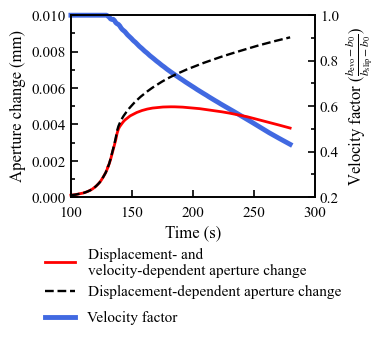

In [36]:
%matplotlib inline
config = {
    "font.size": 11,
    "axes.labelsize": 12,
    "mathtext.fontset": "stix",
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.linewidth": 1.2,
    "xtick.major.size": 5,
    "xtick.major.width": 1.2,
    "ytick.major.size": 5,
    "ytick.major.width": 1.2,
    "xtick.minor.size": 3,
    "xtick.minor.width": 1.2,
    "ytick.minor.size": 3,
    "ytick.minor.width": 1.2,
}
plt.rcParams.update(config)

inch2cm = 2.54
fig = plt.figure(figsize=(8/inch2cm, 6/inch2cm))
plt.subplots_adjust(wspace=0, hspace=0.3)

ax = fig.add_subplot(111)
ax.set_zorder(1)
ax.patch.set_alpha(0)

ax.plot(
    modeled_data_resample['Time (s)'],
    apt.b_mod - b_0_perm,
    "-",
    color="r",
    linewidth=2,
    markerfacecolor="none",
    # markersize=5,
    label="Displacement- and\nvelocity-dependent aperture change",
    zorder=0,
    clip_on=False
)
ax.plot(
    modeled_slip_monot_inj_trunc[modeled_slip_monot_inj_trunc['Time (s)'] >= 100]['Time (s)'],
    modeled_slip_monot_inj_trunc[modeled_slip_monot_inj_trunc['Time (s)'] >= 100]['Disp-dependent aperture (mm)'] - b_0_perm,
    "-",
    color="r",
    linewidth=2,
    markerfacecolor="none",
    # markersize=5,
    # label="Displacement- and\nvelocity-dependent",
    zorder=0,
    clip_on=False
)

ax.plot(
    modeled_data_resample['Time (s)'],
    apt.b_slip - b_0_perm,
    "--",
    color="k",
    linewidth=1.7,
    markerfacecolor="none",
    # markersize=5,
    label="Displacement-dependent aperture change",
    zorder=1,
    clip_on=False
)
ax.plot(
    modeled_slip_monot_inj_trunc[modeled_slip_monot_inj_trunc['Time (s)'] >= 100]['Time (s)'],
    modeled_slip_monot_inj_trunc[modeled_slip_monot_inj_trunc['Time (s)'] >= 100]['Disp-dependent aperture (mm)'] - b_0_perm,
    "--",
    color="k",
    linewidth=1.7,
    markerfacecolor="none",
    # markersize=5,
    # label="Displacement-dependent",
    zorder=1,
    clip_on=False
)

ax.set_xlim(100, 300)
ax.set_ylim(0, 0.01)

ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.001))
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

ax.xaxis.set_tick_params(pad=6)

ax.set_xlabel('Time (s)')
ax.set_ylabel("Aperture change (mm)")
# ax.set_title('Monotonic injection')

ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(0.5, -0.2))


ax2 = ax.twinx()
ax2.set_zorder(0)

ax2.plot(
    merged_time,
    merged_vel_fact,
    '-',
    color='royalblue',
    linewidth=3.5,
    label='Velocity factor',
    clip_on=False,
)

ax2.set_ylim(0.2, 1.)
# ax2.set_yticks(np.arange(0.3, 1.3, 0.3))

ax2.yaxis.set_minor_locator(ticker.FixedLocator(np.arange(0.2, 1.2, 0.1)))
# ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.15))
ax2.yaxis.set_minor_formatter(ticker.NullFormatter())

ax2.set_ylabel('Velocity factor ($\\frac{b_{\\rm evo}-b_{\\rm 0}}{b_{\\rm slip}-b_{\\rm 0}}$)')

ax2.legend(loc='upper center', frameon=False, bbox_to_anchor=(0.165, -0.55))

plt.show()

In [37]:
time_period_vel = np.array([0, modeled_data['Time (s)'].values[0]])
vel_period = np.array([0, modeled_data['Modeled slip velocity (mm/s)'].values[0]])

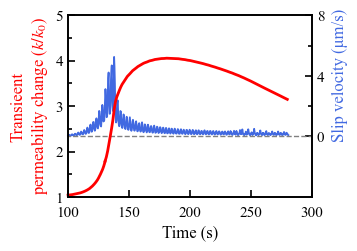

In [38]:
%matplotlib inline
config = {
    "font.size": 11,
    "axes.labelsize": 12,
    "mathtext.fontset": "stix",
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.linewidth": 1.2,
    "xtick.major.size": 5,
    "xtick.major.width": 1.2,
    "ytick.major.size": 5,
    "ytick.major.width": 1.2,
    "xtick.minor.size": 3,
    "xtick.minor.width": 1.2,
    "ytick.minor.size": 3,
    "ytick.minor.width": 1.2,
}
plt.rcParams.update(config)

inch2cm = 2.54
fig = plt.figure(figsize=(8/inch2cm, 6/inch2cm))
plt.subplots_adjust(wspace=0, hspace=0.3)

ax = fig.add_subplot(111)
ax.set_zorder(1)
ax.patch.set_alpha(0)

ax.plot(
    modeled_data_resample['Time (s)'],
    apt.b_mod**2 / b_0_perm**2,
    "-",
    color="r",
    linewidth=2,
    markerfacecolor="none",
    # markersize=5,
    clip_on=False,
    zorder=0
)
ax.plot(
    modeled_slip_monot_inj_trunc[modeled_slip_monot_inj_trunc['Time (s)'] >= 100]['Time (s)'],
    modeled_slip_monot_inj_trunc[modeled_slip_monot_inj_trunc['Time (s)'] >= 100]['Disp-dependent aperture (mm)']**2 / b_0_perm**2,
    "-",
    color="r",
    linewidth=2,
    markerfacecolor="none",
    # markersize=5,
    clip_on=False,
    zorder=0
)

ax.set_xlim(100, 300)
ax.set_ylim(1, 5)

ax.set_yticks(np.arange(1, 6, 1))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())

ax.yaxis.set_minor_locator(ticker.FixedLocator(np.arange(1, 6, 0.5)))
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

ax.xaxis.set_tick_params(pad=6)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Transieent\npermeability change ($k/k_{\\rm 0}$)', color='r')


ax2 = ax.twinx()
ax2.set_zorder(0)

ax2.plot(
    modeled_data[modeled_data['Time (s)'] >= 100][::3]['Time (s)'],
    modeled_data[modeled_data['Time (s)'] >= 100][::3]['Modeled slip velocity (mm/s)'] * 1e3,
    '-',
    color='royalblue',
    linewidth=1.3,
    markerfacecolor='none',
    label='Modeled velocity',
    clip_on=False
)

ax2.plot(
    [0, 300],
    [0, 0],
    '--',
    color='gray',
    linewidth=1.
)

ax2.set_ylim(-4, 8)
ax2.set_yticks(np.arange(0, 10, 4))

ax2.yaxis.set_minor_locator(ticker.FixedLocator(np.arange(0, 10, 2)))
ax2.yaxis.set_minor_formatter(ticker.NullFormatter())

ax2.set_ylabel('Slip velocity (μm/s)', color='royalblue')
ax2.yaxis.set_label_coords(1.08, 0.67)

plt.show()